**Red Wine Quality**

This dataset is related to red variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones). Content For more information, read [Cortez et al., 2009]. Input variables (based on physicochemical tests): 1 - fixed acidity 2 - volatile acidity 3 - citric acid 4 - residual sugar 5 - chlorides 6 - free sulfur dioxide 7 - total sulfur dioxide 8 - density 9 - pH 10 - sulphates 11 - alcohol Output variable (based on sensory data): 12 - quality (score between 0 and 10) What might be an interesting thing to do, is aside from using regression modelling, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'. 

Source:- https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

**Machine Learning Algorithms Used:**

**1-Logistic Regression**

**2-Random Forest Classifier**

**3-Support Vector Machine**

**Exploratory Data Analysis - EDA**

In [22]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [23]:
df=pd.read_csv("winequality-red.csv")

In [24]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [26]:
#checking for null values in the dataframe(dataset)
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [27]:
#checking for duplicate values
sum(df.duplicated())

240

In [28]:
#dropping duplicates from the dataframe
df.drop_duplicates(inplace=True)

In [29]:
sum(df.duplicated())

0

In [30]:
df.shape

(1359, 12)

In [31]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [32]:
df['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

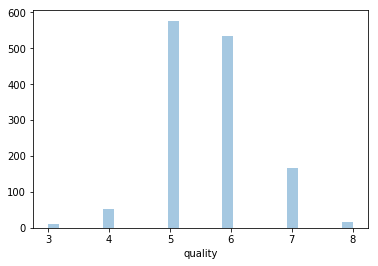

In [33]:
sns.distplot(df['quality'],kde=False)

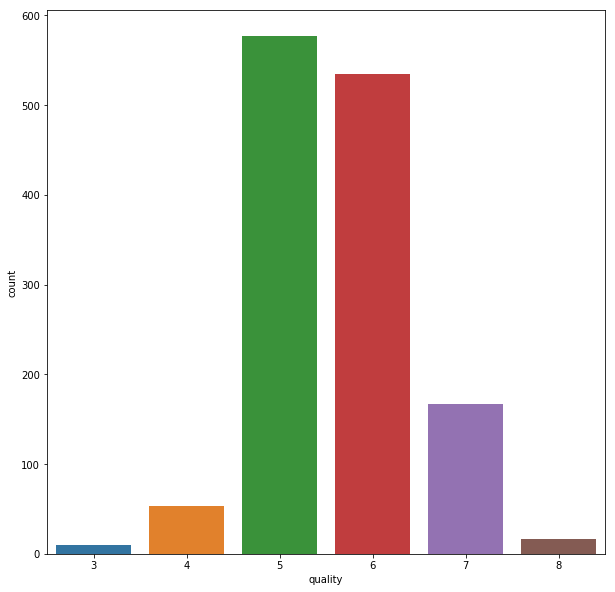

In [34]:
plt.figure(figsize=(10,10))
sns.countplot(df['quality'])

In [35]:
#as we see the quality range is from 3-8 only, as given in the question, we are taking an arbitrary cutoff at 7.
#Making binary classifier for the 'quality' variable
print('Original scale of quality: 0-10:')
print(df['quality'].value_counts())

print( '\nModified Scale of quality: Not Good < 7 <= Good')
df['quality'] = df['quality'].replace({3:'Not Good',4:'Not Good',5:'Not Good',6:'Not Good',7:'Good',8:'Good'})
print(df['quality'].value_counts())

Original scale of quality: 0-10:
5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

Modified Scale of quality: Not Good < 7 <= Good
Not Good    1175
Good         184
Name: quality, dtype: int64


In [ ]:
#or we can do:-
#from sklearn.preprocessing import LabelEncoder
#bins = (2, 6.5, 8)          since there are 2 groups so first group is from 2 to 6.5(or essentially 3-6) and second is from 6.5 to 8(or essentially 7-8)
#group = ['bad', 'good']
#df['quality'] = pd.cut(df['quality'], bins = bins, labels = group)
#lq = LabelEncoder()
#df['quality'] = lq.fit_transform(df['quality'])
#df['quality'].value_counts()

In [36]:
df['quality']=df['quality'].map({'Not Good':0,'Good':1})
df.head()
#mapping 'Not Good':0 ; Good:'1'

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


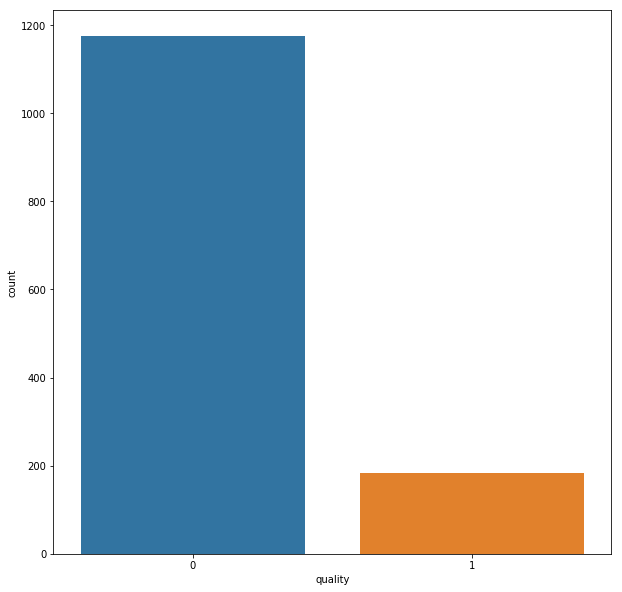

In [37]:
plt.figure(figsize=(10,10))
sns.countplot(df['quality'])

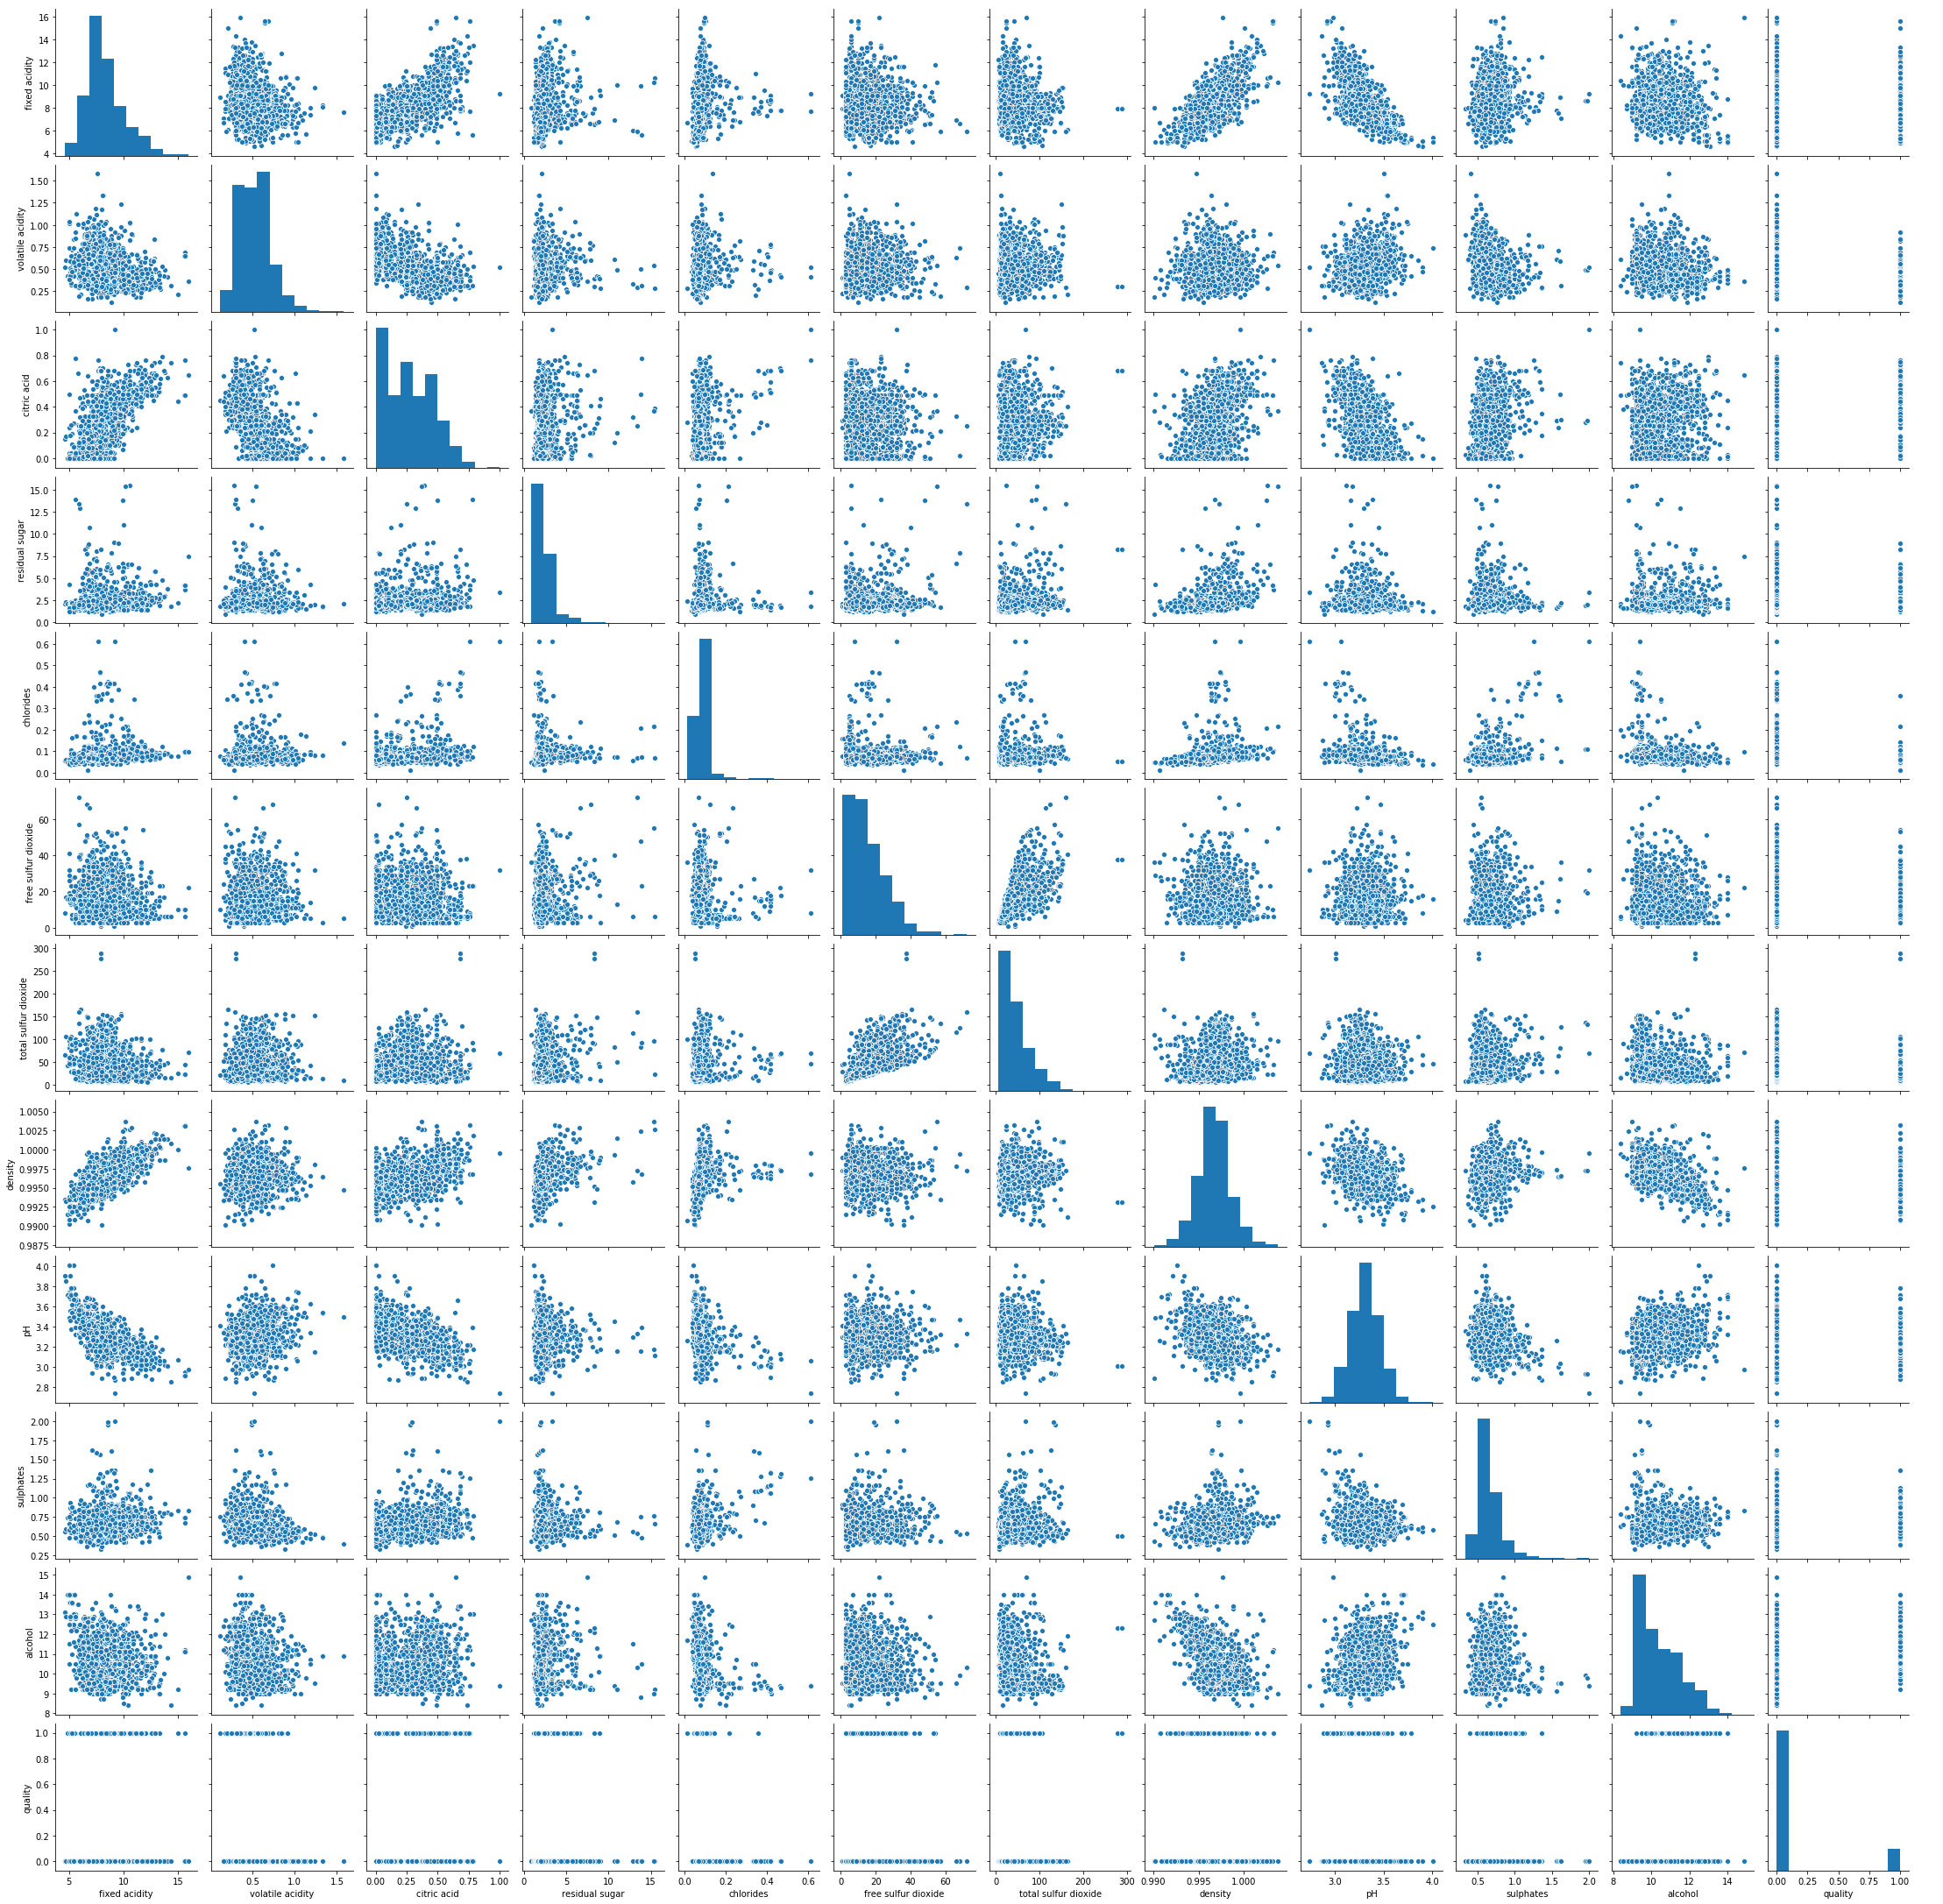

In [38]:
sns.pairplot(df)
#plots pairwise relationships across the whole dataset.

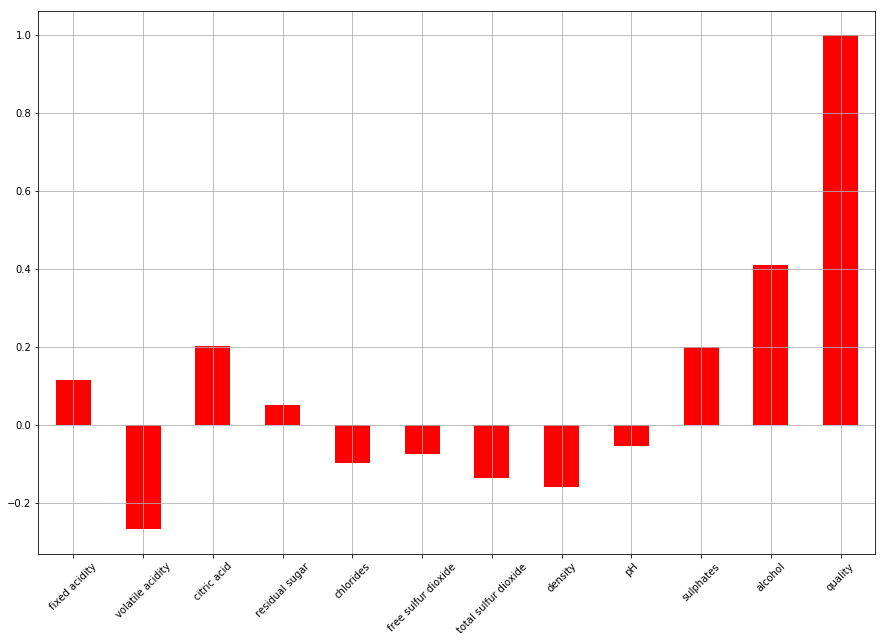

In [39]:
plt.figure(figsize=(15,10))
df.corrwith(df['quality']).plot.bar(color='r',grid=True,rot=45)

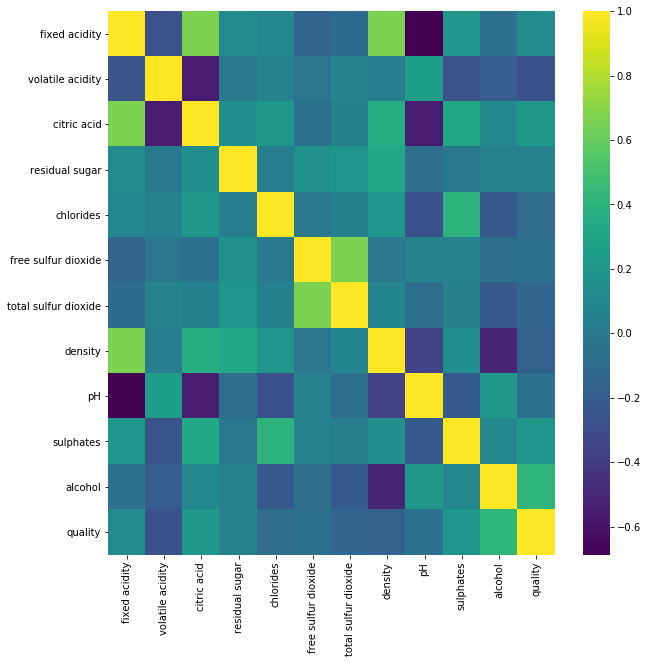

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='viridis')
#plots correlation as color encoded matrices.

**Train and Test Split (77:33)**

In [41]:
X=df.drop('quality',axis=1)
y=df['quality']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [43]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train2 = pd.DataFrame(scaler.fit_transform(X_train))
X_test2 = pd.DataFrame(scaler.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [44]:
#Principal Component Analysis - used for dimensionality reduction
#taking no.of components(clusters) i.e. n_components=4
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(pd.DataFrame(explained_variance))

          0
0  0.280977
1  0.178050
2  0.137709
3  0.116439


**Logistic Regression**

In [45]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(random_state = 0, penalty = 'l2')
lm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
# making predictions on test set.
predictions_logistic = lm.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix:\n',confusion_matrix(y_test,predictions_logistic))
print('Classification Report:\n',classification_report(y_test,predictions_logistic,digits=6))

Confusion Matrix:
 [[372  12]
 [ 48  17]]
Classification Report:
               precision    recall  f1-score   support

           0   0.885714  0.968750  0.925373       384
           1   0.586207  0.261538  0.361702        65

    accuracy                       0.866370       449
   macro avg   0.735961  0.615144  0.643538       449
weighted avg   0.842356  0.866370  0.843773       449



**Random Forest Classifier**

In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 0, n_estimators = 100,criterion = 'entropy')
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [55]:
# making predictions on test set.
predictions_rfc=rfc.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix:\n',confusion_matrix(y_test,predictions_rfc))
print('Classification Report:\n',classification_report(y_test,predictions_rfc,digits=6))

Confusion Matrix:
 [[373  11]
 [ 45  20]]
Classification Report:
               precision    recall  f1-score   support

           0   0.892344  0.971354  0.930175       384
           1   0.645161  0.307692  0.416667        65

    accuracy                       0.875278       449
   macro avg   0.768753  0.639523  0.673421       449
weighted avg   0.856561  0.875278  0.855836       449



**Support Vector Machine**

In [56]:
from sklearn.svm import SVC
svc = SVC(random_state = 0, kernel = 'rbf')
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [57]:
# making predictions on test set.
predictions_svc=svc.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix:\n',confusion_matrix(y_test,predictions_svc))
print('Classification Report:\n',classification_report(y_test,predictions_svc,digits=6))

Confusion Matrix:
 [[379   5]
 [ 56   9]]
Classification Report:
               precision    recall  f1-score   support

           0   0.871264  0.986979  0.925519       384
           1   0.642857  0.138462  0.227848        65

    accuracy                       0.864143       449
   macro avg   0.757061  0.562720  0.576684       449
weighted avg   0.838199  0.864143  0.824520       449



**Results and Comparison**

In [63]:
print('Compiled Results:\n')
print('Logistic Regression Classifier:\n')
print('Classification Report:\n',classification_report(y_test,predictions_logistic,digits=6))
print('Random Forest Classifier:\n')
print('Classification Report:\n',classification_report(y_test,predictions_rfc,digits=6))
print('Support Vector Machine(rbf):\n')
print('Classification Report:\n',classification_report(y_test,predictions_svc,digits=6))

Compiled Results:

Logistic Regression Classifier:

Classification Report:
               precision    recall  f1-score   support

           0   0.885714  0.968750  0.925373       384
           1   0.586207  0.261538  0.361702        65

    accuracy                       0.866370       449
   macro avg   0.735961  0.615144  0.643538       449
weighted avg   0.842356  0.866370  0.843773       449

Random Forest Classifier:

Classification Report:
               precision    recall  f1-score   support

           0   0.892344  0.971354  0.930175       384
           1   0.645161  0.307692  0.416667        65

    accuracy                       0.875278       449
   macro avg   0.768753  0.639523  0.673421       449
weighted avg   0.856561  0.875278  0.855836       449

Support Vector Machine(rbf):

Classification Report:
               precision    recall  f1-score   support

           0   0.871264  0.986979  0.925519       384
           1   0.642857  0.138462  0.227848        65

 